In [5]:
#Random Forest

In [20]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the dataset
# Replace 'telco_churn.csv' with the path to your CSV file
df = pd.read_csv("C:/Users/shyam/Desktop/UCI/Courses/Quarter 2/BANA 273 MACHNE LRNG ANLYTCS/Group Project/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Separate features (X) and target (y)
X = df.drop(['Churn', 'customerID'], axis=1)  # Drop target and ID column
y = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)  # Encode target variable (Yes = 1, No = 0)

# Convert categorical features to dummy variables (one-hot encoding)
X = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42, n_estimators=100, criterion='gini', bootstrap=True, max_features='sqrt')

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature importance
importances = rf.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print("\nTop Features by Importance:\n", feature_importances.head(10))



Accuracy: 0.7977288857345636
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      1036
           1       0.68      0.45      0.54       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.70      1409
weighted avg       0.78      0.80      0.78      1409

Confusion Matrix:
 [[957  79]
 [206 167]]

Top Features by Importance:
                            Feature  Importance
1                           tenure    0.114884
2                   MonthlyCharges    0.091638
27  PaymentMethod_Electronic check    0.029478
9      InternetService_Fiber optic    0.024915
12              OnlineSecurity_Yes    0.024335
24               Contract_Two year    0.023617
18                 TechSupport_Yes    0.021441
25            PaperlessBilling_Yes    0.019433
23               Contract_One year    0.019143
3                      gender_Male    0.018593


## Defining Cross Fold validation to capture Accuracy

In [31]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Use StratifiedKFold to maintain class balance across folds
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf, X, y, cv=cv, scoring='accuracy')

# Print cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
print("Standard Deviation of CV Accuracy:", cv_scores.std())


Cross-Validation Scores: [0.8070922  0.80851064 0.80141844 0.79261364 0.82244318 0.80539773
 0.75284091 0.79971591 0.80681818 0.77130682]
Mean CV Accuracy: 0.7968157640232109
Standard Deviation of CV Accuracy: 0.01924730037019317


In [22]:
# Hyperparameter Tuning for Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
rf_model = RandomForestClassifier(random_state=42, criterion='gini', bootstrap=True)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],          # Number of trees
    'max_depth': [None, 10, 20, 30],         # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],         # Minimum samples to split
    'min_samples_leaf': [1, 2, 4],           # Minimum samples at a leaf
    'max_features': ['sqrt', 'log2', None]   # Number of features to consider
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Tuned Random Forest Accuracy: 0.7984386089425124
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.93      0.87      1036
           1       0.69      0.44      0.53       373

    accuracy                           0.80      1409
   macro avg       0.75      0.68      0.70      1409
weighted avg       0.79      0.80      0.78      1409



Confusion Matrix:
 [[962  74]
 [210 163]]
ROC-AUC Score: 0.857831213059095


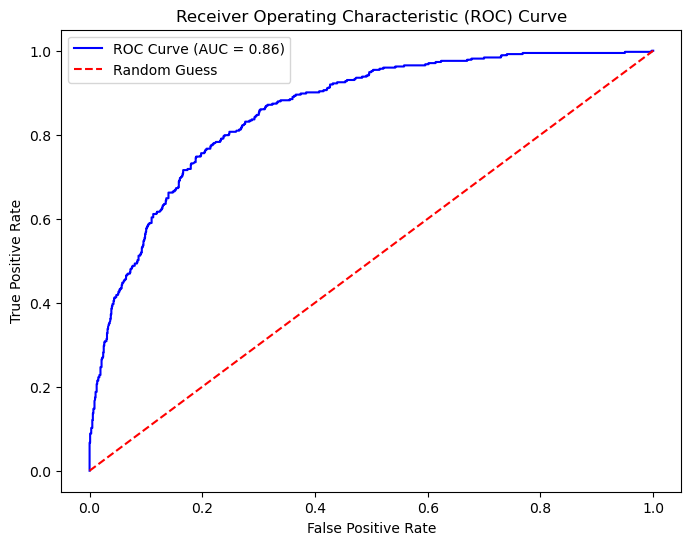

AttributeError: 'RandomForestClassifier' object has no attribute 'coef_'

In [23]:
# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

# Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Feature importance (coefficients)
coefficients = best_rf_model.coef_[0]
feature_importances = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
feature_importances = feature_importances.sort_values(by='Coefficient', key=abs, ascending=False)

print("\nTop Features by Coefficient Magnitude:\n", feature_importances.head(10))

In [32]:
# Perform cross-validation
cv_scores = cross_val_score(best_rf_model, X, y, cv=cv, scoring='accuracy')

# Print cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
print("Standard Deviation of CV Accuracy:", cv_scores.std())

Cross-Validation Scores: [0.79574468 0.81134752 0.82269504 0.78977273 0.81960227 0.80823864
 0.75426136 0.80113636 0.80397727 0.77840909]
Mean CV Accuracy: 0.798518496131528
Standard Deviation of CV Accuracy: 0.01942166718445825


In [4]:
#Logit Model

Accuracy: 0.8239886444286728
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.91      0.88      1036
           1       0.70      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409

Confusion Matrix:
 [[939  97]
 [151 222]]
ROC-AUC Score: 0.8608136573954268


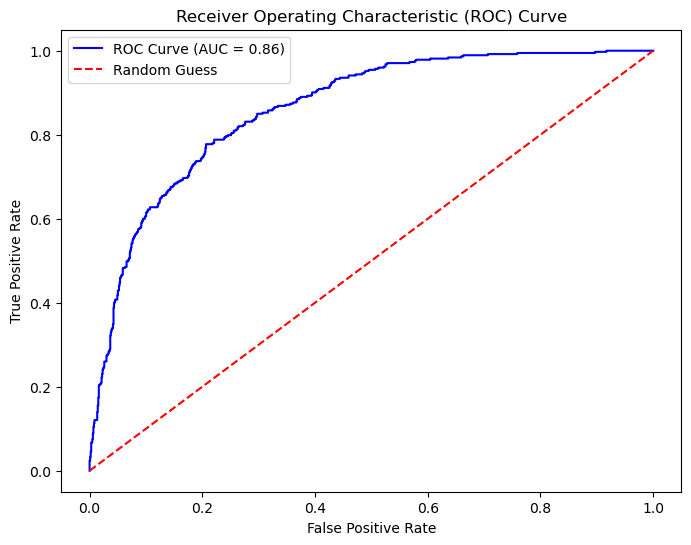


Top Features by Coefficient Magnitude:
                           Feature  Coefficient
24              Contract_Two year    -1.353602
1638            TotalCharges_20.2     1.324966
1644            TotalCharges_20.5     1.298700
1521           TotalCharges_19.95     1.208997
1636            TotalCharges_20.1     1.191504
1514            TotalCharges_19.6     1.128504
3844            TotalCharges_45.3     1.110969
2516          TotalCharges_288.05     1.100316
9     InternetService_Fiber optic     1.066930
4256           TotalCharges_50.45     1.053798


In [34]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Separate features (X) and target (y)
X = df.drop(['Churn', 'customerID'], axis=1)  # Drop target and ID column
y = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)  # Encode target variable (Yes = 1, No = 0)

# Convert categorical features to dummy variables (one-hot encoding)
X = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logit_model = LogisticRegression(max_iter=5000, random_state=42)

# Train the model
logit_model.fit(X_train, y_train)

# Predict on the test set
y_pred = logit_model.predict(X_test)
y_prob = logit_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

# Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Feature importance (coefficients)
coefficients = logit_model.coef_[0]
feature_importances = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
feature_importances = feature_importances.sort_values(by='Coefficient', key=abs, ascending=False)

print("\nTop Features by Coefficient Magnitude:\n", feature_importances.head(10))


In [35]:
# Perform cross-validation
cv_scores = cross_val_score(logit_model, X, y, cv=cv, scoring='accuracy')

# Print cross-validation results
print("Cross-Validation Scores for Logit Model:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
print("Standard Deviation of CV Accuracy:", cv_scores.std())

Cross-Validation Scores for Logit Model: [0.80425532 0.81276596 0.8212766  0.80255682 0.82244318 0.80965909
 0.76846591 0.80397727 0.80113636 0.77414773]
Mean CV Accuracy: 0.8020684235976787
Standard Deviation of CV Accuracy: 0.01695396076761837


C:\Users\shyam\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:19:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8076650106458482
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.67      0.53      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409

Confusion Matrix:
 [[939  97]
 [174 199]]
ROC-AUC Score: 0.857831213059095


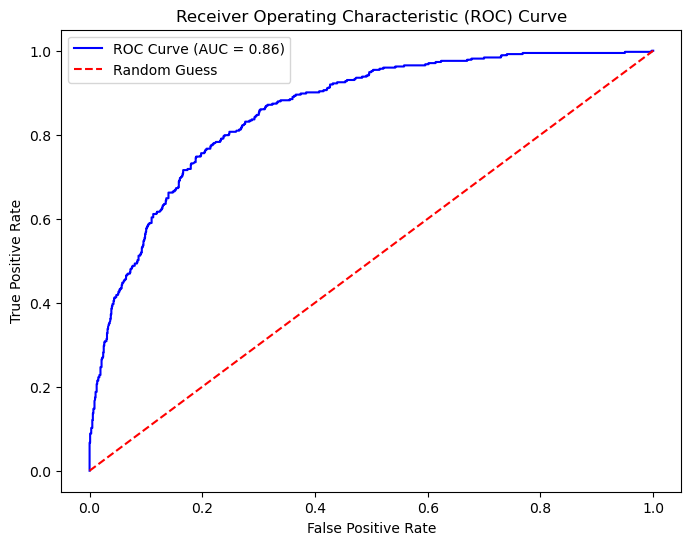


Top Features by Importance:
                            Feature  Importance
9      InternetService_Fiber optic    0.366470
24               Contract_Two year    0.196474
23               Contract_One year    0.125519
10              InternetService_No    0.056910
22             StreamingMovies_Yes    0.033084
6                 PhoneService_Yes    0.024031
1                           tenure    0.022438
8                MultipleLines_Yes    0.016941
27  PaymentMethod_Electronic check    0.015979
12              OnlineSecurity_Yes    0.012414


In [36]:
!pip install xgboost

from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Initialize the XGBoost model
xgb_model = XGBClassifier(
    objective='binary:logistic',  # Binary classification
    eval_metric='logloss',       # Evaluation metric for binary classification
    use_label_encoder=False,     # Avoid warnings in newer versions
    n_estimators=100,            # Number of boosting rounds (trees)
    learning_rate=0.1,           # Step size for boosting
    max_depth=6,                 # Maximum depth of trees
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

# Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Feature importance
importances = xgb_model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print("\nTop Features by Importance:\n", feature_importances.head(10))


In [38]:
# Perform cross-validation
cv_scores = cross_val_score(xgb_model, X, y, cv=cv, scoring='accuracy')

# Print cross-validation results
print("Cross-Validation Scores for XGBoost Model:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
print("Standard Deviation of CV Accuracy:", cv_scores.std())

C:\Users\shyam\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:50:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\shyam\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:50:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\shyam\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:50:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\shyam\anaconda3\Lib\site-packages\

Cross-Validation Scores for XGBoost Model: [0.80992908 0.81560284 0.8070922  0.78693182 0.8125     0.80113636
 0.75568182 0.80397727 0.78977273 0.796875  ]
Mean CV Accuracy: 0.7979499113475177
Standard Deviation of CV Accuracy: 0.016652048293196567


In [39]:
#Step 1: We've now decided we want to use XGBoost and Logit Model for Our Analysis

In [40]:
#Step 2: now we compare pre-processed, basic processing, and advanced processing for the two models


In [43]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt


In [44]:
# Assume `df` is your DataFrame and that the 'Churn' column is the target.

# Prepare the data (features and target)
X = df.drop(['Churn', 'customerID'], axis=1)  # Drop target variable and customer ID
y = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)  # Encode target (Yes=1, No=0)

# Perform one-hot encoding for categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)  # Convert categorical columns into dummy/indicator variables

# Check for missing values (just in case, to avoid errors)
X_encoded = X_encoded.fillna(0)  # Fill any missing values with 0 (adjust as needed)


In [45]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [46]:
# Logistic Regression Model (without pre-processing, just encoding)
logit_model = LogisticRegression(max_iter=5000, random_state=42)
logit_model.fit(X_train, y_train)
logit_y_pred = logit_model.predict(X_test)

# XGBoost Model (without pre-processing, just encoding)
xgb_model = XGBClassifier(
    objective='binary:logistic',  # Binary classification
    eval_metric='logloss',       # Evaluation metric for binary classification
    use_label_encoder=False,     # Avoid warnings in newer versions
    n_estimators=100,            # Number of boosting rounds (trees)
    learning_rate=0.1,           # Step size for boosting
    max_depth=6,                 # Maximum depth of trees
    random_state=42
)
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)

# Random Forest Model (without pre-processing, just encoding)
rf = RandomForestClassifier(random_state=42, max_depth= None, max_features = 'log2', min_samples_leaf = 4, min_samples_split = 2, 
                            n_estimators = 200, criterion='gini', bootstrap=True)
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)

# Evaluate models
logit_accuracy = accuracy_score(y_test, logit_y_pred)
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
rf_accuracy = accuracy_score(y_test, rf_y_pred)

# Print accuracy scores
print(f"Logistic Regression Accuracy (without pre-processing): {logit_accuracy:.4f}")
print(f"XGBoost Accuracy (without pre-processing): {xgb_accuracy:.4f}")
print(f"Random Forest Accuracy (without pre-processing): {rf_accuracy:.4f}")

# Classification Report for all models
print("Logistic Regression Classification Report:\n", classification_report(y_test, logit_y_pred))
print("XGBoost Classification Report:\n", classification_report(y_test, xgb_y_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_y_pred))

# Confusion Matrix for all models
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, logit_y_pred))
print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test, xgb_y_pred))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_y_pred))

# Proportions of Churn
churn_proportions = y.value_counts(normalize=True)
print("\nClass Proportions (Churn):\n", churn_proportions)

# Perform cross-validation on all models
cv_scores1 = cross_val_score(logit_model, X_encoded, y, cv=cv, scoring='accuracy')
cv_scores2 = cross_val_score(xgb_model, X_encoded, y, cv=cv, scoring='accuracy')
cv_scores3 = cross_val_score(rf, X_encoded, y, cv=cv, scoring='accuracy')

# Print cross-validation results
print("Cross-Validation Scores Logistic Regression(without pre-processing, just encoding):", cv_scores1)
print("Mean CV Accuracy:", cv_scores1.mean())
print("Standard Deviation of CV Accuracy:", cv_scores1.std())

print("Cross-Validation Scores XGBoost(without pre-processing, just encoding):", cv_scores2)
print("Mean CV Accuracy:", cv_scores2.mean())
print("Standard Deviation of CV Accuracy:", cv_scores2.std())

print("Cross-Validation Scores Random Forest(without pre-processing, just encoding):", cv_scores3)
print("Mean CV Accuracy:", cv_scores3.mean())
print("Standard Deviation of CV Accuracy:", cv_scores3.std())

C:\Users\shyam\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:17:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Logistic Regression Accuracy (without pre-processing): 0.8240
XGBoost Accuracy (without pre-processing): 0.8077
Random Forest Accuracy (without pre-processing): 0.7353
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.91      0.88      1036
           1       0.70      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.67      0.53      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409

Random Forest Classification Report:
               precision    recall  f1-score   support

         

C:\Users\shyam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shyam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shyam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shyam\anaconda3\Lib\site-packag

Cross-Validation Scores Logistic Regression(without pre-processing, just encoding): [0.80425532 0.81276596 0.8212766  0.80255682 0.82244318 0.80965909
 0.76846591 0.80397727 0.80113636 0.77414773]
Mean CV Accuracy: 0.8020684235976787
Standard Deviation of CV Accuracy: 0.01695396076761837
Cross-Validation Scores XGBoost(without pre-processing, just encoding): [0.80992908 0.81560284 0.8070922  0.78693182 0.8125     0.80113636
 0.75568182 0.80397727 0.78977273 0.796875  ]
Mean CV Accuracy: 0.7979499113475177
Standard Deviation of CV Accuracy: 0.016652048293196567
Cross-Validation Scores Random Forest(without pre-processing, just encoding): [0.73475177 0.73475177 0.73475177 0.73579545 0.734375   0.734375
 0.734375   0.734375   0.734375   0.734375  ]
Mean CV Accuracy: 0.7346300773694391
Standard Deviation of CV Accuracy: 0.00042342889184847013


In [13]:
#Step 3: Pre-Processing Data

In [57]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Assuming df is your DataFrame
# Step 1: Prepare features and target variable
X = df.drop(['Churn', 'customerID'], axis=1)  # Drop target and customer ID
y = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)  # Encode target variable as 1 (Yes) and 0 (No)

# Step 2: Handle Categorical Columns (One-Hot Encoding)
# List of categorical columns
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                       'PaymentMethod']

# Apply one-hot encoding to categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Step 3: Convert numerical columns to numeric type if they are not already
X_encoded['MonthlyCharges'] = pd.to_numeric(X_encoded['MonthlyCharges'], errors='coerce')
X_encoded['TotalCharges'] = pd.to_numeric(X_encoded['TotalCharges'], errors='coerce')

# Fill any remaining NaN values (from conversion) with the median
X_encoded['MonthlyCharges'].fillna(X_encoded['MonthlyCharges'].median(), inplace=True)
X_encoded['TotalCharges'].fillna(X_encoded['TotalCharges'].median(), inplace=True)

# Step 4: Feature scaling
scaler = StandardScaler()
X_scaled = X_encoded.copy()
X_scaled[X_encoded.columns] = scaler.fit_transform(X_encoded)  # Scale the features

# Step 5: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 6: Optionally balance the dataset using SMOTE (over-sampling minority class)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Step 7: Train Logistic Regression Model
logit_model = LogisticRegression(max_iter=1000, random_state=42)
logit_model.fit(X_train_smote, y_train_smote)
logit_y_pred = logit_model.predict(X_test)

# Step 8: Train XGBoost Model
xgb_model = XGBClassifier(
    objective='binary:logistic',  # Binary classification
    eval_metric='logloss',       # Evaluation metric for binary classification
    use_label_encoder=False,     # Avoid warnings in newer versions
    n_estimators=100,            # Number of boosting rounds (trees)
    learning_rate=0.1,           # Step size for boosting
    max_depth=6,                 # Maximum depth of trees
    random_state=42
)
xgb_model.fit(X_train_smote, y_train_smote)
xgb_y_pred = xgb_model.predict(X_test)

# Random Forest Model (without pre-processing, just encoding)
rf = RandomForestClassifier(random_state=42, max_depth= None, max_features = 'log2', min_samples_leaf = 4, min_samples_split = 2, 
                            n_estimators = 200, criterion='gini', bootstrap=True)
rf.fit(X_train_smote, y_train_smote)
rf_y_pred = rf.predict(X_test)

# Step 9: Evaluate Models
logit_accuracy = accuracy_score(y_test, logit_y_pred)
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
rf_accuracy = accuracy_score(y_test, rf_y_pred)

# Print results
print(f"Logistic Regression Accuracy (with pre-processing): {logit_accuracy:.4f}")
print(f"XGBoost Accuracy (with pre-processing): {xgb_accuracy:.4f}")
print(f"Random Forest Accuracy (without pre-processing): {rf_accuracy:.4f}")

# Classification Reports
print("Logistic Regression Classification Report:\n", classification_report(y_test, logit_y_pred))
print("XGBoost Classification Report:\n", classification_report(y_test, xgb_y_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_y_pred))

# Confusion Matrix
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, logit_y_pred))
print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test, xgb_y_pred))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_y_pred))


# Class Proportions (Churn)
churn_proportions = y.value_counts(normalize=True)
print("\nClass Proportions (Churn):\n", churn_proportions)

# Perform cross-validation on both models
smote_pipeline1 = ImbPipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('classifier', logit_model)
])
smote_pipeline2 = ImbPipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('classifier', xgb_model)
])
smote_pipeline3 = ImbPipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('classifier', rf)
])
cv_scores1 = cross_val_score(smote_pipeline1, X_scaled, y, cv=cv, scoring='accuracy')
cv_scores2 = cross_val_score(smote_pipeline2, X_scaled, y, cv=cv, scoring='accuracy')
cv_scores3 = cross_val_score(smote_pipeline3, X_scaled, y, cv=cv, scoring='accuracy')

# Print cross-validation results
print("Cross-Validation Scores Logistic Regression(with pre-processing):", cv_scores1)
print("Mean CV Accuracy:", cv_scores1.mean())
print("Standard Deviation of CV Accuracy:", cv_scores1.std())

print("Cross-Validation Scores XGBoost(with pre-processing):", cv_scores2)
print("Mean CV Accuracy:", cv_scores2.mean())
print("Standard Deviation of CV Accuracy:", cv_scores2.std())

print("Cross-Validation Scores Random Forest(with pre-processing):", cv_scores3)
print("Mean CV Accuracy:", cv_scores3.mean())
print("Standard Deviation of CV Accuracy:", cv_scores3.std())


C:\Users\shyam\AppData\Local\Temp\ipykernel_29592\2425686157.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded['MonthlyCharges'].fillna(X_encoded['MonthlyCharges'].median(), inplace=True)
C:\Users\shyam\AppData\Local\Temp\ipykernel_29592\2425686157.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

Logistic Regression Accuracy (with pre-processing): 0.7551
XGBoost Accuracy (with pre-processing): 0.7999
Random Forest Accuracy (without pre-processing): 0.7892
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.73      0.81      1036
           1       0.52      0.83      0.64       373

    accuracy                           0.76      1409
   macro avg       0.72      0.78      0.73      1409
weighted avg       0.82      0.76      0.77      1409

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86      1036
           1       0.61      0.68      0.64       373

    accuracy                           0.80      1409
   macro avg       0.74      0.76      0.75      1409
weighted avg       0.81      0.80      0.80      1409

Random Forest Classification Report:
               precision    recall  f1-score   support

           0   

C:\Users\shyam\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:00:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\shyam\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:00:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\shyam\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:00:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\shyam\anaconda3\Lib\site-packages\

Cross-Validation Scores Logistic Regression(with pre-processing): [0.75177305 0.76028369 0.73900709 0.74431818 0.76988636 0.74715909
 0.70738636 0.78551136 0.74147727 0.75284091]
Mean CV Accuracy: 0.7499643375241779
Standard Deviation of CV Accuracy: 0.019553099814694868
Cross-Validation Scores XGBoost(with pre-processing): [0.80425532 0.80283688 0.80425532 0.79403409 0.80681818 0.79119318
 0.74005682 0.81534091 0.79403409 0.76704545]
Mean CV Accuracy: 0.7919870245003224
Standard Deviation of CV Accuracy: 0.021241346473667152
Cross-Validation Scores Random Forest(with pre-processing): [0.79007092 0.7787234  0.78723404 0.77698864 0.80397727 0.77698864
 0.74715909 0.80681818 0.77840909 0.76988636]
Mean CV Accuracy: 0.7816255641521599
Standard Deviation of CV Accuracy: 0.01620050307056509


In [15]:
#Step 4: Now that we have the pre processing, we iterate over the techniques for pre processing

In [55]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.model_selection import StratifiedKFold

# Create a function to evaluate the model's performance
def evaluate_model(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy using {model}: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    print(f"Cross-Validation Scores {model}: {cv_scores}")
    print("Mean CV Accuracy:", cv_scores.mean())
    print("Standard Deviation of CV Accuracy:", cv_scores.std())

    
# Declare the models to compare
# Step 8: Train XGBoost Model
xgb_model = XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)
logit_model = LogisticRegression(max_iter=1000, random_state=42)
rf = RandomForestClassifier(random_state=42, max_depth= None, max_features = 'log2', min_samples_leaf = 4, min_samples_split = 2, 
                            n_estimators = 200, criterion='gini', bootstrap=True)

# Iteration 1: Standard Scaler vs MinMax Scaler
print("Evaluating with StandardScaler vs MinMaxScaler")

# StandardScaler (previous method)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("\nUsing StandardScaler")
evaluate_model(X_train, y_train, X_test, y_test, logit_model)
evaluate_model(X_train, y_train, X_test, y_test, xgb_model)
evaluate_model(X_train, y_train, X_test, y_test, rf)

# MinMaxScaler
minmax_scaler = MinMaxScaler()
X_minmax = minmax_scaler.fit_transform(X_encoded)

X_train, X_test, y_train, y_test = train_test_split(X_minmax, y, test_size=0.2, random_state=42)

print("\nUsing MinMaxScaler")
evaluate_model(X_train, y_train, X_test, y_test, logit_model)
evaluate_model(X_train, y_train, X_test, y_test, xgb_model)
evaluate_model(X_train, y_train, X_test, y_test, rf)

# Iteration 2: Feature Selection using SelectKBest
print("\nEvaluating with Feature Selection (SelectKBest)")

# Using SelectKBest to select top 10 features
selector = SelectKBest(f_classif, k=10)
X_selected = selector.fit_transform(X_encoded, y)

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

print("\nUsing SelectKBest with top 10 features")
evaluate_model(X_train, y_train, X_test, y_test, logit_model)
evaluate_model(X_train, y_train, X_test, y_test, xgb_model)
evaluate_model(X_train, y_train, X_test, y_test, rf)

# Iteration 3: Binning Continuous Features
print("\nEvaluating with Binning Continuous Features")

# Binning MonthlyCharges and TotalCharges into 3 categories (Low, Medium, High)
bins = [0, 30, 70, 200]  # Adjust bin values based on your data distribution
labels = ['Low', 'Medium', 'High']

X_binned = X_encoded.copy()
X_binned['MonthlyCharges'] = pd.cut(X_encoded['MonthlyCharges'], bins=bins, labels=labels)
X_binned['TotalCharges'] = pd.cut(X_encoded['TotalCharges'], bins=bins, labels=labels)

# One-hot encode the binned columns (so they can be used in the model)
X_binned = pd.get_dummies(X_binned, columns=['MonthlyCharges', 'TotalCharges'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_binned, y, test_size=0.2, random_state=42)

print("\nUsing Binned Continuous Features")
evaluate_model(X_train, y_train, X_test, y_test, logit_model)
evaluate_model(X_train, y_train, X_test, y_test, xgb_model)
evaluate_model(X_train, y_train, X_test, y_test, rf)

# Iteration 4: Resampling (SMOTE vs RandomOverSampler)
print("\nEvaluating with Different Resampling Methods")

# Using SMOTE (previous method)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("\nUsing SMOTE")
evaluate_model(X_train_smote, y_train_smote, X_test, y_test, logit_model)
evaluate_model(X_train, y_train, X_test, y_test, xgb_model)
evaluate_model(X_train, y_train, X_test, y_test, rf)

# Using RandomOverSampler (another resampling method)
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

print("\nUsing RandomOverSampler")
evaluate_model(X_train_ros, y_train_ros, X_test, y_test, logit_model)
evaluate_model(X_train, y_train, X_test, y_test, xgb_model)
evaluate_model(X_train, y_train, X_test, y_test, rf)

# Iteration 5: Combining Pre-processing Steps
print("\nEvaluating with Combined Pre-processing Steps")

# Combine pre-processing: MinMaxScaler + Feature Selection + SMOTE
scaler = MinMaxScaler()
X_scaled_minmax = scaler.fit_transform(X_encoded)
selector = SelectKBest(f_classif, k=10)
X_selected = selector.fit_transform(X_scaled_minmax, y)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_selected, y)

X_train, X_test, y_train, y_test = train_test_split(X_train_smote, y_train_smote, test_size=0.2, random_state=42)

print("\nUsing Combined Pre-processing: MinMaxScaler + SelectKBest + SMOTE")
evaluate_model(X_train, y_train, X_test, y_test, logit_model)
evaluate_model(X_train, y_train, X_test, y_test, xgb_model)
evaluate_model(X_train, y_train, X_test, y_test, rf)

Evaluating with StandardScaler vs MinMaxScaler

Using StandardScaler
Accuracy using LogisticRegression(max_iter=1000, random_state=42): 0.8197
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409

Confusion Matrix:
 [[933 103]
 [151 222]]
Cross-Validation Scores LogisticRegression(max_iter=1000, random_state=42): [0.76241135 0.80851064 0.81382979 0.80851064 0.79751332 0.78152753
 0.81172291 0.81349911 0.80284192 0.79396092]
Mean CV Accuracy: 0.7994328130708086
Standard Deviation of CV Accuracy: 0.015676192331645515
Accuracy using XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=N

C:\Users\shyam\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:09:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\shyam\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:09:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\shyam\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:09:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\shyam\anaconda3\Lib\site-packages\

Cross-Validation Scores XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...): [0.74468085 0.7712766  0.79255319 0.77836879 0.76554174 0.78152753
 0.76909414 0.77619893 0.77619893 0.77442274]
Mean CV Accuracy: 0.7729863446833705
Standard Deviation of CV Accuracy: 0.011756633927883947
Accuracy

C:\Users\shyam\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:09:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\shyam\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:09:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy using XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...): 0.7984
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1036
           1       0.64      0.54      0.58       373

    accuracy                

C:\Users\shyam\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:09:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\shyam\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:09:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\shyam\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:09:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\shyam\anaconda3\Lib\site-packages\

Cross-Validation Scores XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...): [0.74468085 0.7712766  0.79255319 0.77836879 0.76554174 0.78152753
 0.76909414 0.77619893 0.77619893 0.77442274]
Mean CV Accuracy: 0.7729863446833705
Standard Deviation of CV Accuracy: 0.011756633927883947
Accuracy

C:\Users\shyam\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:09:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\shyam\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:09:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\shyam\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:10:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy using XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...): 0.8041
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1036
           1       0.65      0.56      0.60       373

    accuracy                

C:\Users\shyam\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:10:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\shyam\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:10:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\shyam\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:10:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\shyam\anaconda3\Lib\site-packages\

Cross-Validation Scores XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...): [0.72340426 0.77836879 0.79787234 0.77659574 0.79218472 0.77087034
 0.78152753 0.78330373 0.79218472 0.79928952]
Mean CV Accuracy: 0.7795601703135432
Standard Deviation of CV Accuracy: 0.02073748659734732
Accuracy 

C:\Users\shyam\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:10:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\shyam\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:10:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\shyam\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:10:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\shyam\anaconda3\Lib\site-packages\

Cross-Validation Scores XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...): [0.7570922  0.75886525 0.77659574 0.77836879 0.77975133 0.78152753
 0.77619893 0.75843694 0.78507993 0.76909414]
Mean CV Accuracy: 0.7721010795762318
Standard Deviation of CV Accuracy: 0.009941416243909505
Accuracy

C:\Users\shyam\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:10:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\shyam\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:10:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\shyam\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:10:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\shyam\anaconda3\Lib\site-packages\

Cross-Validation Scores XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...): [0.7570922  0.75886525 0.77659574 0.77836879 0.77975133 0.78152753
 0.77619893 0.75843694 0.78507993 0.76909414]
Mean CV Accuracy: 0.7721010795762318
Standard Deviation of CV Accuracy: 0.009941416243909505
Accuracy

C:\Users\shyam\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:10:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\shyam\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:10:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\shyam\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:10:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\shyam\anaconda3\Lib\site-packages\

Cross-Validation Scores XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...): [0.7570922  0.75886525 0.77659574 0.77836879 0.77975133 0.78152753
 0.77619893 0.75843694 0.78507993 0.76909414]
Mean CV Accuracy: 0.7721010795762318
Standard Deviation of CV Accuracy: 0.009941416243909505
Accuracy

C:\Users\shyam\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:10:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\shyam\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:10:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\shyam\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:10:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\shyam\anaconda3\Lib\site-packages\

Cross-Validation Scores XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...): [0.76328502 0.75845411 0.78623188 0.76570048 0.75603865 0.7705314
 0.75241546 0.78502415 0.75816203 0.76299879]
Mean CV Accuracy: 0.7658841981669384
Standard Deviation of CV Accuracy: 0.011001171351752116
Accuracy 

In [ ]:
#We have found that minmax scaling produces the most accurate confusion matrices, while xgboost
#and logit models after undergoing scaling perform less accurately than the models who have
#not yet been pre-processed.In fact the ost accurate was the logit model before pre processing.
#binning, however, got us closer than minmax scaling, smote